<a href="https://colab.research.google.com/github/KFaneneCS/machine-learning-claim-predictor/blob/main/Claim_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Machine Learning Claim Predictor**

# Data

In [ ]:
from warnings import filterwarnings
filterwarnings("ignore")

import cufflinks as cf
from plotly.offline import init_notebook_mode, plot
init_notebook_mode(connected=True)
cf.go_offline()

## Import Claims Data

In [ ]:
import pandas as pd
import numpy as np
# Reading csv file obtained from Kaggle dataset
raw_link = 'https://raw.githubusercontent.com/kylef92/claims_data_file/main/Car_Insurance_Claim.csv'
claims_data = pd.read_csv(raw_link)
claims_data

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1,after 2015,0,1,10238,12000.0,sedan,0,0,0,0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0,before 2015,0,0,10238,16000.0,sedan,0,0,0,1
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1,before 2015,0,0,10238,11000.0,sedan,0,0,0,0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1,before 2015,0,1,32765,11000.0,sedan,0,0,0,0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1,before 2015,0,0,32765,12000.0,sedan,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,323164,26-39,female,majority,10-19y,university,upper class,0.582787,1,before 2015,0,0,10238,16000.0,sedan,0,0,1,0
9996,910346,26-39,female,majority,10-19y,none,middle class,0.522231,1,after 2015,0,1,32765,NaN,sedan,1,0,0,0
9997,468409,26-39,male,majority,0-9y,high school,middle class,0.470940,1,before 2015,0,1,10238,14000.0,sedan,0,0,0,0
9998,903459,26-39,female,majority,10-19y,high school,poverty,0.364185,0,before 2015,0,1,10238,13000.0,sedan,2,0,1,1


## Data Exploration

In [ ]:
# General information including column names, counts, and data types
claims_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  int64  
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  int64  
 11  CHILDREN             10000 non-null  int64  
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [ ]:
claims_data.describe()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


In [ ]:
# Shuffle dataset order, reset index
claims_data = claims_data.sample(frac=1, ignore_index=True)

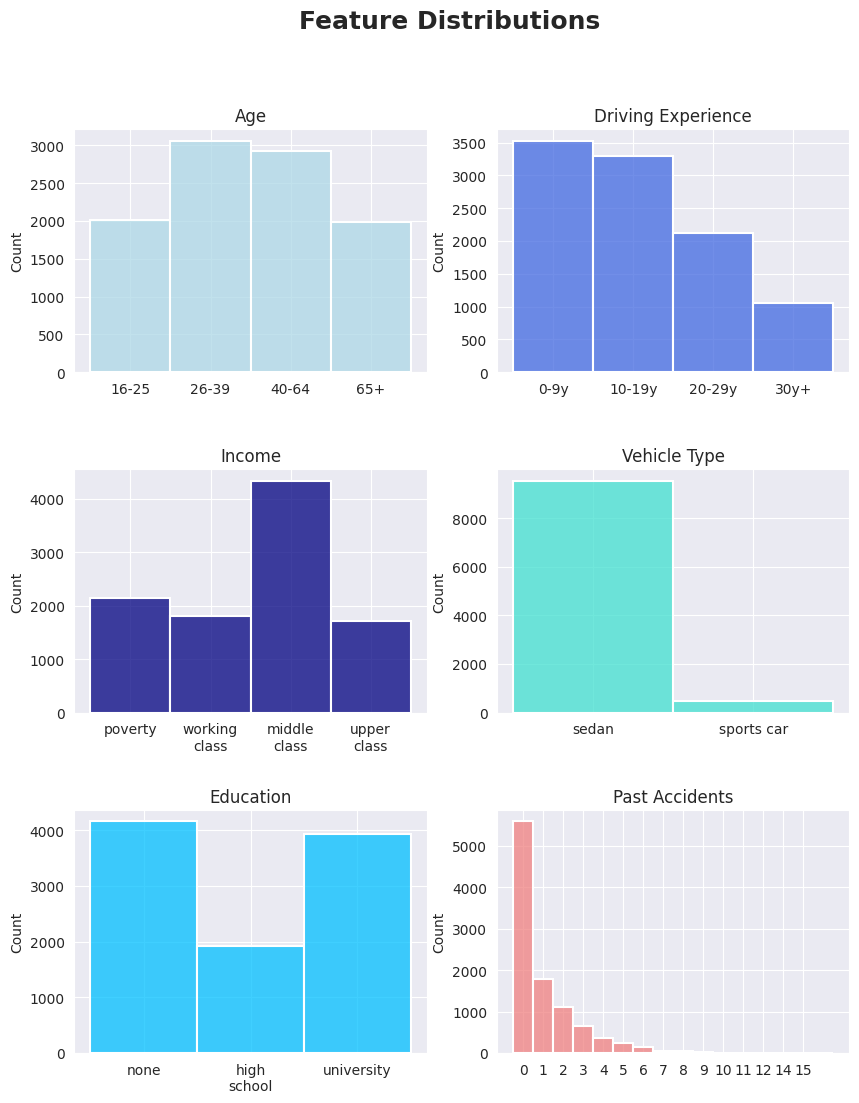

In [ ]:
# Let's take a look at some of our data's categorical features.
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap

sns.set_style('darkgrid')

# Set feature order and color attributes
feature_config = {
    'AGE': {
        'order': None,
        'color': 'lightblue'
    },
    'DRIVING_EXPERIENCE': {
        'order': None,
        'color': 'royalblue'
    },
    'INCOME': {
        'order': ['poverty', 'working class', 'middle class', 'upper class'],
        'color': 'navy'
    },
    'VEHICLE_TYPE': {
        'order': None,
        'color': 'turquoise'
    },
    'EDUCATION': {
        'order': ['none', 'high school', 'university'],
        'color': 'deepskyblue'
    },
    'PAST_ACCIDENTS': {
        'order': None,
        'color': 'lightcoral'
    },
}

category_data = []

# Create a 3-by-2 grid for our subplots
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3,
                                             ncols=2,
                                             figsize=(10, 12),
                                             gridspec_kw={'hspace': 0.4})
fig.suptitle('Feature Distributions', fontsize=18, fontweight='bold')
axes = [ax1, ax2, ax3, ax4, ax5, ax6]

# Store index and frequency information for each feature
for feature in feature_config.keys():
    counts = claims_data[feature].value_counts().sort_index()
    order = feature_config[feature]['order']
    ind = counts.index if order is None else order
    freq = counts.values
    category_data.append((ind, freq))

# Plot distribution for each feature
for i, feature in enumerate(feature_config.keys()):
    ax = axes[i]
    ind, freq = category_data[i]
    labels = ['\n'.join(textwrap.wrap(str(label), width=10)) for label in ind]

    ax.set_xticks(range(len(ind)))
    ax.set_xticklabels(labels)

    temp_data = pd.DataFrame({'Category': ind, 'Frequency': freq})

    sns.histplot(data=temp_data,
                 x='Category',
                 weights='Frequency',
                 ax=ax,
                 color=feature_config[feature]['color'],
                 discrete=True,
                 linewidth=1.5)
    ax.set_xlabel('')

    title = feature.title().replace('_', ' ')
    ax.set_title(f'{title}')


In [ ]:
import plotly.graph_objs as go

# Let's also take a look at our numeric features.
trace = go.Histogram(x=claims_data['CREDIT_SCORE'],)
layout = go.Layout(title='Credit Score Distribution')
fig = go.Figure(data=[trace], layout=layout)

fig.show(renderer='colab')

In [ ]:
trace = go.Histogram(x=claims_data['ANNUAL_MILEAGE'],)
layout = go.Layout(title='Mileage Distribution')
fig = go.Figure(data=[trace], layout=layout)

fig.show(renderer='colab')

## Data Processing

In [ ]:
# Removing "Race" column to avoid any potential racial discrimination in machine-learning model.
# In any event, the mere two values "majority" and "minority" do not provide much statistical value.
claims_data.drop('RACE', axis=1, inplace=True)

# Also removing "ID" column since the ID value is arbitrary.
claims_data.drop('ID', axis=1, inplace=True)

### Splitting

In [ ]:
from sklearn.model_selection import train_test_split

# Features matrix
X = claims_data.drop('OUTCOME', axis=1)

# Target
y = claims_data['OUTCOME']

# Train/test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### Imputation

Text(0.5, 1.0, 'Missing Values Overview')

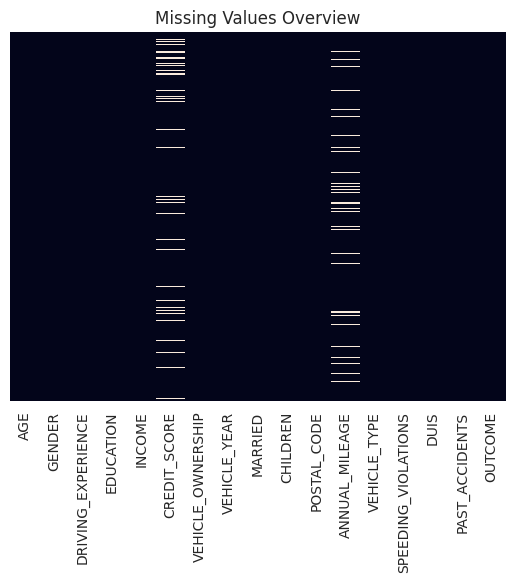

In [ ]:
# Let's review characteristics of our columns with missing data (credit score & annual mileage).
sns.heatmap(claims_data.isnull(), cbar=False, yticklabels=False)
plt.title('Missing Values Overview')

In [ ]:
# Encode copies of our data sets to prepare for imputation
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

train_copy, test_copy = X_train.copy(), X_test.copy()

for col in train_copy.select_dtypes(include='object').columns:
    combined_series = pd.concat([train_copy[col], test_copy[col]])
    label_encoder.fit(combined_series)

    # Transform object columns for each set
    train_copy[col] = label_encoder.transform(train_copy[col])
    test_copy[col] = label_encoder.transform(test_copy[col])

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=10)
filled_X_train, filled_X_test = X_train.copy(), X_test.copy()

filled_X_train[['CREDIT_SCORE', 'ANNUAL_MILEAGE']] = imputer.fit_transform(train_copy[['CREDIT_SCORE', 'ANNUAL_MILEAGE']])
filled_X_test[['CREDIT_SCORE', 'ANNUAL_MILEAGE']] = imputer.transform(test_copy[['CREDIT_SCORE', 'ANNUAL_MILEAGE']])

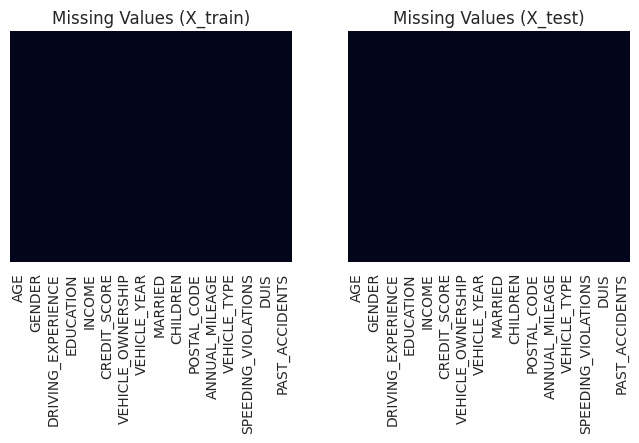

In [ ]:
# Now, let's review our Missing Values Overview heatmap again to confirm no missing values.
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
sets = {'X_train': filled_X_train, 'X_test': filled_X_test}
axes = [ax1, ax2]

# Creates a missing-values heatmap for each set.
# Note that each heatmap is blank, indicating no missing values.
for i, (set_name, dataset) in enumerate(sets.items()):
    sns.heatmap(dataset.isnull(),
                cbar=False,
                ax=axes[i],
                yticklabels=False)
    axes[i].set_title(label=f'Missing Values ({set_name})')

In [ ]:
# Next, we compare the value distributions of our original claims dataset
# and our now-filled X_test set to evaluate our imputation method.
from plotly import subplots
import plotly.graph_objects as go

fig = subplots.make_subplots(rows=2,
                             cols=2,
                             subplot_titles=['Pre-Imputation', 'Post-Imputation'],
                             vertical_spacing=0.05)
fig.update_xaxes(showticklabels=False)
fig.update_layout(width=900, height=900)
fig.add_trace(go.Box(y=X_train['CREDIT_SCORE'], name='Credit Score (Before)'), row=1, col=1)
fig.add_trace(go.Box(y=filled_X_train['CREDIT_SCORE'], name='Credit Score (After)'), row=1, col=2)
fig.add_trace(go.Box(y=X_train['ANNUAL_MILEAGE'], name='Mileage (Before)'), row=2, col=1)
fig.add_trace(go.Box(y=filled_X_train['ANNUAL_MILEAGE'], name='Mileage (After)'), row=2, col=2)

fig.show(renderer='colab')

### Encoding

In [ ]:
ordinal_features = ['DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS']
nominal_features = ['AGE', 'GENDER', 'INCOME', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN', 'POSTAL_CODE', 'VEHICLE_TYPE', 'VEHICLE_YEAR']

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Instantiate the classes we'll need to One-Hot encode our data
one_hot_encoder = OneHotEncoder(sparse_output=False)
transformer = ColumnTransformer([('one_hot_encoder',
                                  one_hot_encoder,
                                  nominal_features)],
                                remainder='passthrough')

# Binning features to handle scattered outliers for speeding violations, DUIs, and past accidents
def bin(val, threshold, label):
    return label if val >= threshold else str(val)

binnings = {
    'SPEEDING_VIOLATIONS': {'threshold': 5, 'label': '5 or more'},
    'DUIS': {'threshold': 3, 'label': '3 or more'},
    'PAST_ACCIDENTS': {'threshold': 4, 'label': '4 or more'}
}

for col, params in binnings.items():
    if col in filled_X_train.columns:
        filled_X_train[col] = filled_X_train[col].apply(lambda x: bin(x, params['threshold'], params['label']))
        filled_X_test[col] = filled_X_test[col].apply(lambda x: bin(x, params['threshold'], params['label']))

# Create separate copies of dataset splits for labeling
labeled_X_train, labeled_X_test = filled_X_train.copy(), filled_X_test.copy()

# Create dataset combining all imputed datasets
combined_data = pd.concat([filled_X_train, filled_X_test], axis=0)

# Dict to stores LabelEncoder object for ordinal columns
le_dict = {}

# 1) Label encoding ordinal features
for col in ordinal_features:
    label_encoder = LabelEncoder()

    # Sets may be missing unique values, so we will fit the encoder on the combined data
    label_encoder.fit(combined_data[col])

    # Transform each set
    labeled_X_train[col] = label_encoder.transform(filled_X_train[col])
    labeled_X_test[col] = label_encoder.transform(filled_X_test[col])

    # Store LE object
    le_dict[col] = label_encoder

# One-Hot encoding nominal features
one_hot_encoded_train = one_hot_encoder.fit_transform(labeled_X_train[nominal_features])
one_hot_encoded_test = one_hot_encoder.transform(labeled_X_test[nominal_features])

# Combine one-hot encoded data with the rest of your data
transformed_X_train = np.hstack([one_hot_encoded_train, labeled_X_train.drop(nominal_features, axis=1).values])
transformed_X_test = np.hstack([one_hot_encoded_test, labeled_X_test.drop(nominal_features, axis=1).values])

# Models

## Linear Support Vector Classification

In [ ]:
# Our ultimate goal is to determine the probability that a policyholder will file a claim.
# We first use the LinearSVC model for our classification problem.

from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline

clf_lsvc = make_pipeline(LinearSVC(dual=False, random_state=0))

# Train model
clf_lsvc.fit(transformed_X_train, y_train)

Pipeline(steps=[('linearsvc', LinearSVC(dual=False, random_state=0))])

## Random Forest

In [ ]:
# The LinearSVC model is great for smaller-sample classification problems, but it doesn't
# allow us to easily predict probability.  Now we will try the Random Forest model.

from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(max_depth=2, random_state=0)
clf_rf.fit(transformed_X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

## LightGBM

In [ ]:
# Finally, we will use a gradient-boosted LightGBM algorithm.

from lightgbm import LGBMClassifier

clf_lgb = LGBMClassifier(objective='binary',
                         metric='binary_logloss',
                         learning_rate=0.08,
                         max_bin=285,
                         n_estimators=120,
                         verbose=0)

clf_lgb.fit(transformed_X_train, y_train)

LGBMClassifier(learning_rate=0.08, max_bin=285, metric='binary_logloss',
               n_estimators=120, objective='binary', verbose=0)

# Evaluation

In [ ]:
# Initialize dictionary to track info for each model
models_info = {
    'LinearSVC': {
        'classifier': clf_lsvc,
        'color': 'maroon',
        'cmap': 'Reds',
    },
    'Random Forest': {
        'classifier': clf_rf,
        'color': 'green',
        'cmap': 'Greens',
    },
    'LightGBM': {
        'classifier': clf_lgb,
        'color': 'deepskyblue',
        'cmap': 'Blues',
    },
}

## Basic Scoring

In [ ]:
# Calculate accuracy of our LinearSVC model
accuracy = clf_lsvc.score(transformed_X_test, y_test)
print(f'Accuracy = {accuracy*100:.2f}%')
# Add basic score to dict
models_info['LinearSVC']['basic score'] = accuracy

Accuracy = 83.17%


In [ ]:
# Calculate accuracy of our Random Forest model
accuracy = clf_rf.score(transformed_X_test, y_test)
print(f'Accuracy = {accuracy*100:.2f}%')
# Add basic score to dict
models_info['Random Forest']['basic score'] = accuracy

Accuracy = 79.50%


In [ ]:
# Calculate accuracy of our LightGBM model

from sklearn.metrics import accuracy_score

y_pred = clf_lgb.predict(transformed_X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy = {accuracy*100:.2f}%')
# Add basic score to dict
models_info['LightGBM']['basic score'] = accuracy

Accuracy = 85.23%


## Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

In [ ]:
# Get cross-validation scores for each of the three models
for name, model_info in models_info.items():
    # Cross-validate on our training set 5 times
    cv_scores = cross_val_score(model_info['classifier'], transformed_X_train, y_train, cv=5)
    mean_cv_score = cv_scores.mean()

    # Display scores and scores' average
    print(name)
    print(f'CV Scores:  {[round(score, 4) for score in cv_scores]}')
    print(f'Mean CV Score: {mean_cv_score*100:.2f}%\n')

    # Add mean CV score to corresponding model info in models_info dict
    models_info[name]['mean cv score'] = mean_cv_score

LinearSVC
CV Scores:  [0.8457, 0.8407, 0.8379, 0.8507, 0.8271]
Mean CV Score: 84.04%

Random Forest
CV Scores:  [0.795, 0.7857, 0.8029, 0.8107, 0.7936]
Mean CV Score: 79.76%

LightGBM
CV Scores:  [0.8471, 0.8393, 0.8421, 0.8607, 0.8464]
Mean CV Score: 84.71%



## ROC Curve

Random Forest AUC Score = 87.30%
LightGBM AUC Score = 91.94%


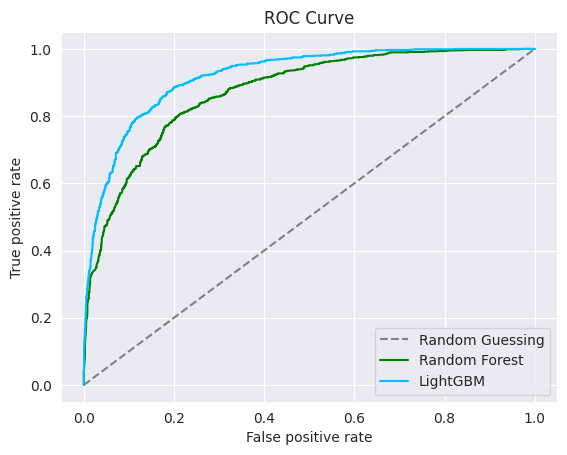

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Initialize "Random Guessing" line of ROC curve (50/50 line)
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', label='Random Guessing')

for name, model_info in models_info.items():
    # Excluding LinearSVC due to issues with predicting probability
    if name == 'LinearSVC':
        models_info[name]['auc score'] = None
        continue

    y_probs = model_info['classifier'].predict_proba(transformed_X_test)
    y_probs_positive = y_probs[:, 1]

    # Calculate thresholds
    fpr, tpr, thrsh = roc_curve(y_test, y_probs_positive)

    # Display ROC curve
    plt.plot(fpr,
             tpr,
             color=models_info[name]['color'],
             label=name)

    # Calculate area-under-curve score (perfect score = 1.0, or 100%)
    auc_score = roc_auc_score(y_test, y_probs_positive)
    print(f'{name} AUC Score = {auc_score*100:.2f}%')

    # Add AUC score to dict
    models_info[name]['auc score'] = auc_score


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend();

## Confusion Matrix

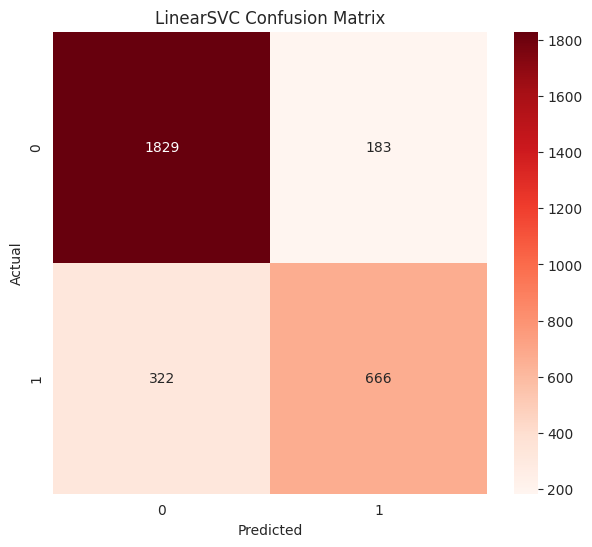

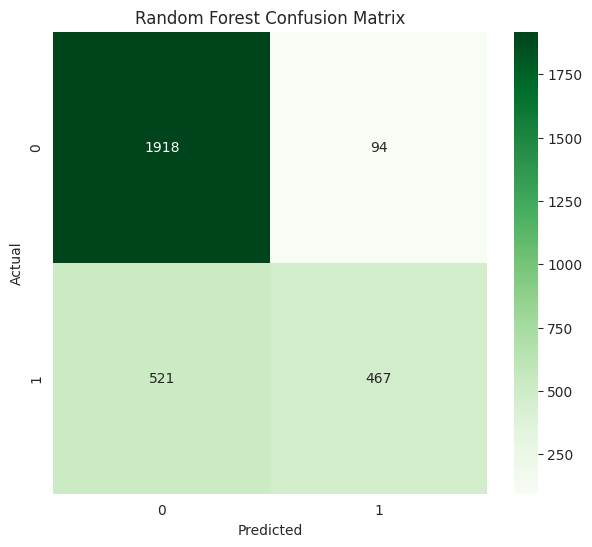

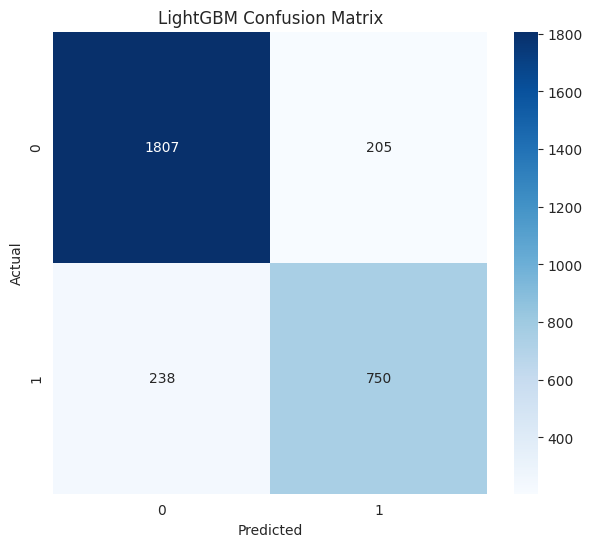

In [ ]:
# Provides a visual representation of the number of true positives, true negatives, false positives, and false negatives
from sklearn.metrics import confusion_matrix

for name, model_info in models_info.items():
    clf = model_info['classifier']
    y_preds = clf.predict(transformed_X_test)
    confusion_matrix(y_test, y_preds)
    cm = confusion_matrix(y_test, y_preds)

    # Add confusion matrix values to dict
    models_info[name]['confusion matrix'] = cm

    # Visualize with seaborn heatmap
    plt.figure(figsize=(7,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=model_info['cmap'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{name} Confusion Matrix')


## Review

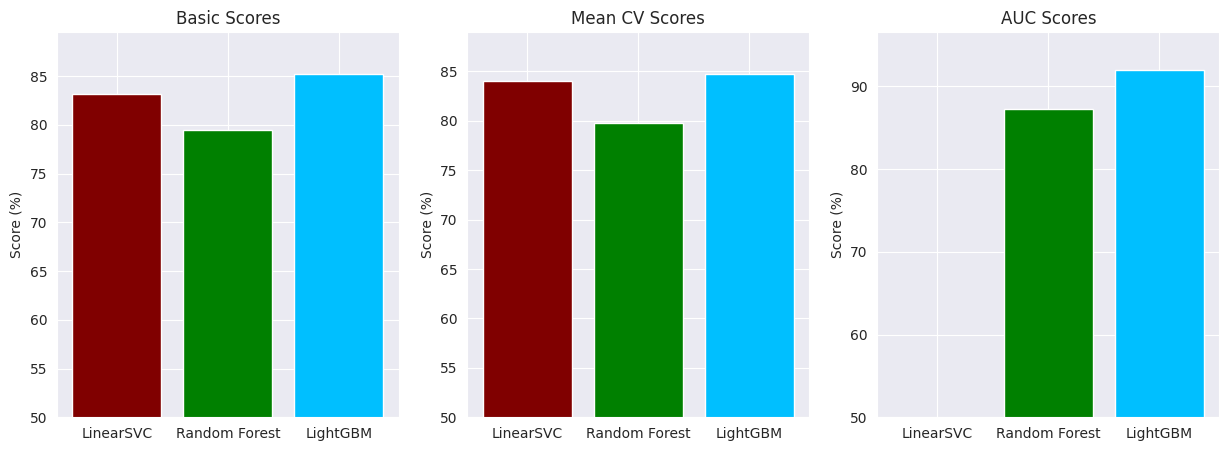

In [ ]:
model_names = list(models_info.keys())
model_colors = [models_info[name]['color'] for name in model_names]

basic_scores = [info['basic score'] * 100 if info['basic score'] is not None else 0 for info in models_info.values()]
mean_cv_scores = [info['mean cv score'] * 100 if info['mean cv score'] is not None else 0 for info in models_info.values()]
auc_scores = [info['auc score'] * 100 if info['auc score'] is not None else 0 for info in models_info.values()]

# Create figure with 3 subplots for our model scores
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

ax1.bar(model_names, basic_scores, color=model_colors, label='Basic Score')
ax1.set_title('Basic Scores')
ax1.set_ylabel('Score (%)')
ax1.set_ylim(bottom=50)

ax2.bar(model_names, mean_cv_scores, color=model_colors, label='Mean CV Score')
ax2.set_title('Mean CV Scores')
ax2.set_ylabel('Score (%)')
ax2.set_ylim(bottom=50)

ax3.bar(model_names, auc_scores, color=model_colors, label='AUC Score')
ax3.set_title('AUC Scores')
ax3.set_ylabel('Score (%)')
ax3.set_ylim(bottom=50);

# Final Steps
After evaluating each model, we will ultimately decide to move forward with the LightGBM model.

## Saving Model

In [ ]:
import pickle

In [ ]:
# Fetch the LightGBM classifier
clf = models_info['LightGBM']['classifier']

# Save model to .pkl file
pickle.dump(clf, open('lightgbm_model.pkl', 'wb'))

## Processing New Data

In [ ]:
def process_new_data(new_data: pd.DataFrame) -> np.ndarray:
    data_copy = new_data.copy()

    # Handle "other" option for Postal Code feature since model was not trained on that option
    if data_copy['POSTAL_CODE'].iloc[0] is None:
        data_copy['POSTAL_CODE'] = claims_data['POSTAL_CODE'].mode()

    # 1) Label encoding ordinal features
    for col in ordinal_features:
        label_encoder = le_dict.get(col)
        data_copy[col] = label_encoder.transform(new_data[col])

    # 2) One-Hot encoding nominal features
    one_hot_encoded = one_hot_encoder.transform(data_copy[nominal_features])
    # one_hot_encoded = one_hot_encoder.transform(new_data[nominal_features])

    processed_data = np.hstack([one_hot_encoded, data_copy.drop(nominal_features, axis=1).values])

    return processed_data

## Loading Model

In [ ]:
# Load saved model
loaded_model = pickle.load(open('lightgbm_model.pkl', 'rb'))

# User Interface

In [ ]:
import ipywidgets as widgets
from IPython.display import display, HTML

def run():
    # Create titles using HTML
    title_personal_info = widgets.HTML('<h3>Personal Information</h3>')
    title_demographics = widgets.HTML('<h3>Demographics</h3>')
    title_gender_vehicle = widgets.HTML('<h3>Gender and Vehicle</h3>')
    title_vehicle_info = widgets.HTML('<h3>Vehicle Info</h3>')
    title_driving_history = widgets.HTML('<h3>Driving History</h3>')
    title_numerical_sliders = widgets.HTML('<h3>Other Information</h3>')
    title_prediction = widgets.HTML('<h3>Claim Prediction</h3>')

    # Select Widgets
    age_select = widgets.Select(
        options=['16-25', '26-39', '40-64', '65+'],
        value='16-25',
        description='Age',
        disabled=False,
    )

    experience_select = widgets.Select(
        options=['0-9y', '10-19y', '20-29y', '30y+'],
        value='0-9y',
        description='Driving Exp.',
        disabled=False,
    )

    education_select = widgets.Select(
        options=['none', 'high school', 'university'],
        value='none',
        description='Education',
        disabled=False,
    )

    income_select = widgets.Select(
        options=['poverty', 'working class', 'middle class', 'upper class'],
        value='working class',
        description='Income Level',
        disabled=False,
    )

    postal_code_select = widgets.Select(
        options=[(10238, 10238), (21217, 21217), (32765, 32765), (92101, 92101), ('other', None)],
        value=10238,
        description='Postal Code',
        disabled=False,
    )

    speeding_select = widgets.Select(
        options=['0', '1', '2', '3', '4', '5 or more'],
        value='0',
        description='Speeding Tix',
        disabled=False,
    )

    duis_select = widgets.Select(
        options=['0', '1', '2', '3 or more'],
        value='0',
        description='DUIs',
        disabled=False,
    )

    accidents_select = widgets.Select(
        options=['0', '1', '2', '3', '4 or more'],
        value='0',
        description='Accidents',
        disabled=False,
    )

    # Radio Button Widgets
    gender_radio = widgets.RadioButtons(
        options=['male', 'female'],
        value='male',
        description='Gender',
        disabled=False,
    )

    ownership_radio = widgets.RadioButtons(
        options=[('yes', 1), ('no', 0)],
        value=1,
        description='Is owned?',
        disabled=False,
    )

    married_radio = widgets.RadioButtons(
        options=[('yes', 1), ('no', 0)],
        value=1,
        description='Is married?',
        disabled=False,
    )

    children_radio = widgets.RadioButtons(
        options=[('yes', 1), ('no', 0)],
        value=1,
        description='Has children?',
        disabled=False,
    )

    vehicle_year_radio = widgets.RadioButtons(
        options=['before 2015', 'after 2015'],
        value='before 2015',
        description='Year',
        disabled=False,
    )

    type_radio = widgets.RadioButtons(
        options=['sedan', 'sports car'],
        value='sedan',
        description='Type',
        disabled=False,
    )


    # Numeric Slider Widgets
    credit_score_slider = widgets.FloatSlider(
        value=0.5,
        min=0,
        max=1.0,
        step=0.02,
        description='Credit Score',
        disabled=False,
        continuous_update=False,
        orientation='horizontal',
        readout=True,
        readout_format='.2f',
    )

    mileage_slider = widgets.IntSlider(
        value=12500,
        min=0,
        max=25000,
        step=500,
        description='Ann. Miles',
        disabled=False,
        continuous_update=False,
        orientation='horizontal',
        readout=True,
    )

    # Button to calculate prediction
    prediction_button = widgets.Button(
        description='Predict!',
        disabled=False,
        button_style='',
        tooltip='Click me',
        icon='check',
        layout=widgets.Layout(width='30%', height='80px')
    )

    # Output widget for prediction of filing a claim
    prob_output = widgets.Output(layout=widgets.Layout(padding='10px'))

    # Progress widget for our prediction of filing a claim
    prediction_progress = widgets.FloatProgress(
        value=7.5,
        min=0,
        max=1.0,
        description='Probability',
        bar_style='',
        style={'bar_color': 'maroon'},
        orientation='horizontal',
        layout=widgets.Layout(width='60%', height='50px', margin='15px')
    )

    # Grouping widgets
    personal_info_box = widgets.VBox([
        title_personal_info,
        widgets.HBox([age_select, experience_select, education_select]),
        # widgets.HBox([])
    ])


    demographics_box = widgets.VBox([
        title_demographics,
        widgets.HBox([income_select, postal_code_select]),
        widgets.HBox([gender_radio, children_radio, married_radio])
    ])

    vehicle_info_box = widgets.VBox([
        title_vehicle_info,
        widgets.HBox([ownership_radio, vehicle_year_radio, type_radio]),
    ])

    driving_history_box = widgets.VBox([
        title_driving_history,
        widgets.HBox([speeding_select, duis_select, accidents_select])
    ])

    numerical_sliders_box = widgets.VBox([
        title_numerical_sliders,
        widgets.HBox([credit_score_slider, mileage_slider]),
    ])

    prediction_box = widgets.VBox([
        title_prediction,
        widgets.HBox([prediction_button, prob_output]),
        widgets.HBox([prediction_progress]),
    ])

    # Display the groups
    display(personal_info_box, demographics_box, vehicle_info_box, driving_history_box, numerical_sliders_box, prediction_box)

    def get_user_input_values():
        age = age_select.value
        gender = gender_radio.value
        driving_experience = experience_select.value
        education = education_select.value
        income = income_select.value
        credit_score = credit_score_slider.value
        vehicle_ownership = ownership_radio.value
        vehicle_year = vehicle_year_radio.value
        married = married_radio.value
        children = children_radio.value
        postal_code = postal_code_select.value
        annual_mileage = mileage_slider.value
        vehicle_type = type_radio.value
        speeding_violations = speeding_select.value
        duis = duis_select.value
        past_accidents = accidents_select.value

        return [age, gender, driving_experience, education, income, credit_score,
                vehicle_ownership, vehicle_year, married, children, postal_code,
                annual_mileage, vehicle_type, speeding_violations, duis, past_accidents]

    def calculate_probability():
        user_input = get_user_input_values()
        new_df = pd.DataFrame(data=[user_input], columns=X.columns)
        processed_data = process_new_data(new_df)
        probability = loaded_model.predict_proba(processed_data)
        return probability

    def on_button_click(b):
        with prob_output:
            prob_output.clear_output()
            new_probability = calculate_probability()[0][1]
            prediction_progress.value = new_probability
            display(HTML(f'<div style="font-size: 30px;">{new_probability*100:.2f}%</div>'))

    prediction_button.on_click(on_button_click)

run()